In [247]:
#Question we have to answer-
#How do annual members and casual riders use Cyclistic bikes differently?


In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
#reading the .csv file for data from last month
df = pd.read_csv('Jun2023_trip.csv')

In [281]:
pd.isnull(df).sum()

ride_id              0
rideable_type        0
started_at           0
ended_at             0
end_lng            889
member_casual        0
Duration             0
Weekday          84075
dtype: int64

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719618 entries, 0 to 719617
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ride_id        719618 non-null  object        
 1   rideable_type  719618 non-null  object        
 2   started_at     719618 non-null  datetime64[ns]
 3   ended_at       719618 non-null  datetime64[ns]
 4   end_lng        718729 non-null  float64       
 5   member_casual  719618 non-null  object        
 6   Duration       719618 non-null  int32         
 7   Weekday        635543 non-null  category      
dtypes: category(1), datetime64[ns](2), float64(1), int32(1), object(3)
memory usage: 41.9+ MB


In [251]:
#changing datatype for two columns to datetime
df['ended_at'] = df['ended_at'].astype('datetime64')
df['started_at'] = df['started_at'].astype('datetime64')

In [127]:
#adding column having name od day cycle was used
df['Weekday'] = df['started_at'].dt.strftime('%A')

In [252]:
#adding new column having duration of time cycle was used 
df['Duration'] = df['ended_at'] - df['started_at']

In [ ]:
#dropped unwanted column
df.drop(['start_station_id','start_station_name','end_station_name','end_station_id','start_lat','start_lng','end_lat','end_lat','end_lng'], axis=1 , inplace=True)

In [274]:
df.head()

,ride_id,rideable_type,started_at,ended_at,end_lng,member_casual,Duration,Weekday
0,6F1682AC40EB6F71,electric_bike,2023-06-05 13:34:12,2023-06-05 14:31:56,-87.70,member,3464,Monday
1,622A1686D64948EB,electric_bike,2023-06-05 01:30:22,2023-06-05 01:33:06,-87.65,member,164,Monday
2,3C88859D926253B4,electric_bike,2023-06-20 18:15:49,2023-06-20 18:32:05,-87.63,member,976,Tuesday
3,EAD8A5E0259DEC88,electric_bike,2023-06-19 14:56:00,2023-06-19 15:00:35,-87.66,member,275,Monday
4,5A36F21930D6A55C,electric_bike,2023-06-19 15:03:34,2023-06-19 15:07:16,-87.65,member,222,Monday


In [257]:
#Eliminating the duplictaes 
df.drop_duplicates(inplace =True)

In [258]:
#Most preferred day to use bike by all customers
df['Weekday'].mode()

0    Friday
Name: Weekday, dtype: category
Categories (6, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

In [259]:
#Day preferred by member and casual 
Mode_for_member_casual = df.groupby('member_casual')['Weekday'].apply(lambda x: x.mode().iloc[0])

In [260]:
#Calculating mean of duration  for both member and casual  
Avg_mem_cas = df.groupby('member_casual')['Duration'].mean()

In [261]:
#Counting total number of rider for last month 
Count_By_Users = df.groupby('member_casual')['ride_id'].count()

In [262]:
#Counting number of customer used cycle by weekday
Count_By_day = df.groupby('Weekday')['ride_id'].count()

In [263]:
#Mean of duration cycle used by customers for each day 
Avg_Duration =df.groupby('Weekday')['Duration'].mean()

In [264]:
# Converting timedelta to total seconds for the "Duration" column
df['Duration'] = df['Duration'].dt.total_seconds()

In [265]:
#Keeping the weekdays in order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)

#Mean of duration cycle used by casual for each day and changind datatype to make graph
Casual_Avg_duration_By_Days = df[df["member_casual"] == "casual"].groupby('Weekday')['Duration'].mean()
df['Duration'] = df['Duration'].astype(int)


In [275]:
#Mean of duration cycle used by Member only for each day 
Member_Avg_duration_By_Days = df[df["member_casual"] == "member"].groupby('Weekday')['Duration'].mean()
df['Duration'] = df['Duration'].astype(int)

In [276]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at', 'end_lng',
       'member_casual', 'Duration', 'Weekday'],
      dtype='object')

In [277]:
# Reseting the index to have 'Weekday' as a regular column for plotting
Member_Avg_duration_By_Days = Member_Avg_duration_By_Days.reset_index()

Casual_Avg_duration_By_Days = Casual_Avg_duration_By_Days.reset_index()

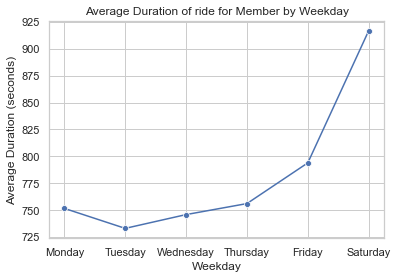

In [278]:
sns.set(style="whitegrid")

# Create the line plot using Seaborn
sns.lineplot(x='Weekday', y='Duration', data=Member_Avg_duration_By_Days, marker='o', ci=None)

# Setting the labels and title
plt.xlabel('Weekday')
plt.ylabel('Average Duration (seconds)')
plt.title('Average Duration of ride for Member by Weekday')

plt.show()


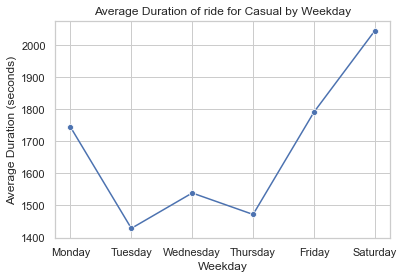

In [279]:
sns.set(style="whitegrid")

# Create the line plot using Seaborn
sns.lineplot(x='Weekday', y='Duration', data=Casual_Avg_duration_By_Days , marker='o' ,ci=None , )

# Setting the labels and title
plt.xlabel('Weekday')
plt.ylabel('Average Duration (seconds)')
plt.title('Average Duration of ride for Casual by Weekday')


plt.show()


In [280]:
df.to_csv('Jun2023_trip.csv', index=False)

In [246]:

Member_Avg_duration_By_Days = df[df["member_casual"] == "casual"].count()
Member_Avg_duration_By_Days

ride_id          301230
rideable_type    301230
started_at       301230
ended_at         301230
end_lng          300440
member_casual    301230
Duration         301230
Weekday          301230
dtype: int64